In [2]:
#Importar librerias necesarias para el estudio y manipulación de los datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', names = ["Class","Age", "Sex", "Steroid", "Antivirals", "Fatigue","Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders", "Ascites", "Varices", "Bilirubin", "Alk Phosphate", "Albumin", "Protime", "Histology"])
hept_df = pd.DataFrame(data=data)
print(hept_df)

    Class  Age Sex  Steroid Antivirals Fatigue Malaise Anorexia Liver Big  \
2      30    2   1        2          2       2       2        1         2   
2      50    1   1        2          1       2       2        1         2   
2      78    1   2        2          1       2       2        2         2   
2      31    1   ?        1          2       2       2        2         2   
2      34    1   2        2          2       2       2        2         2   
..    ...  ...  ..      ...        ...     ...     ...      ...       ...   
1      46    1   2        2          1       1       1        2         2   
2      44    1   2        2          1       2       2        2         1   
2      61    1   1        2          1       1       2        1         1   
2      53    2   1        2          1       2       2        2         2   
1      43    1   2        2          1       2       2        2         2   

   Liver Firm Spleen Palpable Spiders Ascites Varices Bilirubin Alk Phospha

In [4]:
hept_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 2 to 1
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    object
 3   Steroid          155 non-null    int64 
 4   Antivirals       155 non-null    object
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Albumin          155 non-null    object
 17  Protime          155 non-null    obje

In [5]:
mis_val= ['?', 'NaN']
cln_hpt_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', names = ["Class","Age", "Sex", "Steroid", "Antivirals", "Fatigue","Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders", "Ascites", "Varices", "Bilirubin", "Alk Phosphate", "Albumin", "Protime", "Histology"], na_values=mis_val)

print(cln_hpt_df)
print(cln_hpt_df.isnull())
print(cln_hpt_df.isnull().sum())

    Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
2      30    2  1.0        2         2.0      2.0      2.0       1.0   
2      50    1  1.0        2         1.0      2.0      2.0       1.0   
2      78    1  2.0        2         1.0      2.0      2.0       2.0   
2      31    1  NaN        1         2.0      2.0      2.0       2.0   
2      34    1  2.0        2         2.0      2.0      2.0       2.0   
..    ...  ...  ...      ...         ...      ...      ...       ...   
1      46    1  2.0        2         1.0      1.0      1.0       2.0   
2      44    1  2.0        2         1.0      2.0      2.0       2.0   
2      61    1  1.0        2         1.0      1.0      2.0       1.0   
2      53    2  1.0        2         1.0      2.0      2.0       2.0   
1      43    1  2.0        2         1.0      2.0      2.0       2.0   

    Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  \
2         2.0         2.0              2.0      2.0      2.0  

In [6]:
cln_hpt_df.isnull().sum()

Class               0
Age                 0
Sex                 1
Steroid             0
Antivirals          1
Fatigue             1
Malaise             1
Anorexia           10
Liver Big          11
Liver Firm          5
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             6
Bilirubin          29
Alk Phosphate       4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [13]:
cln_hpt_df = cln_hpt_df.dropna(axis=0)
print(cln_hpt_df)

    Class  Age  Steroid  Histology
2      30    2        2          1
2      50    1        2          1
2      78    1        2          1
2      31    1        1          1
2      34    1        2          1
..    ...  ...      ...        ...
1      46    1        2          2
2      44    1        2          2
2      61    1        2          2
2      53    2        2          2
1      43    1        2          2

[155 rows x 4 columns]


In [8]:
cln_hpt_df.isnull().sum()

Class        0
Age          0
Steroid      0
Histology    0
dtype: int64

In [9]:
cln_hpt_df.shape

(155, 4)

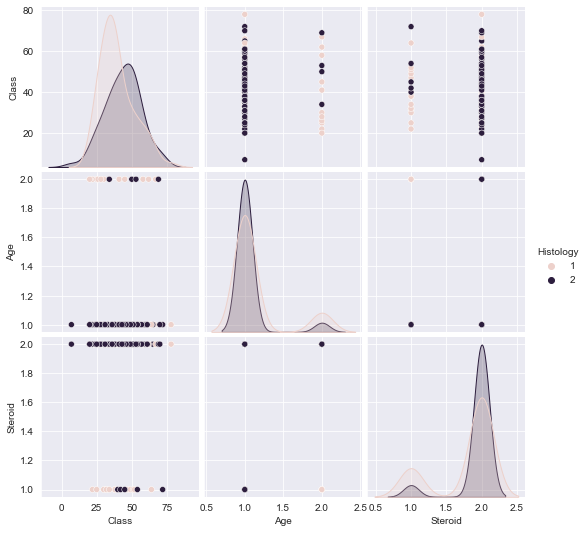

In [10]:
sns.pairplot(cln_hpt_df, hue='Histology')

<AxesSubplot:>

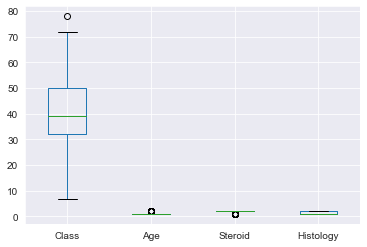

In [11]:
cln_hpt_df.boxplot()

In [12]:
#Normalizando el Dataframe
scaler = MinMaxScaler()
scaler.fit(cln_hpt_df)

MinMaxScaler()